<a href="https://colab.research.google.com/github/Romulan12/Traffic-Sign-Recognition/blob/master/Traffic_Signs_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs
!ls german-traffic-signs



fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.
signnames.csv  test.p  train.p	valid.p


In [3]:
import preprocessing
import model

Using TensorFlow backend.


In [0]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import pandas as pd
import cv2
#from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [0]:
%matplotlib inline
np.random.seed(0)
# TODO: Implement load the data here.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)



In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

 

In [8]:
#already 4 dimensional
print(X_train.shape)
print(X_val.shape)
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."


(34799, 32, 32, 3)
(4410, 32, 32, 3)


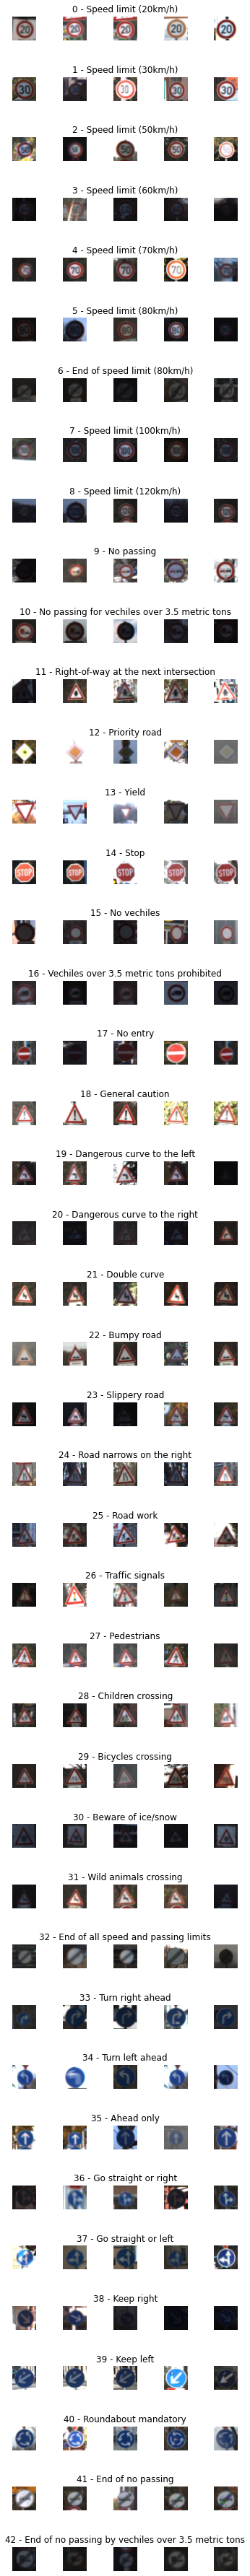

In [9]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
  
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


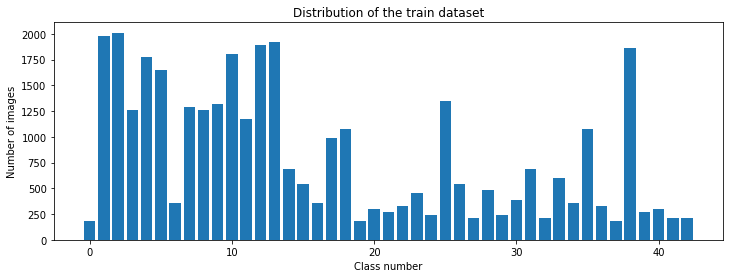

In [10]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


(34799, 32, 32)
(4410, 32, 32)


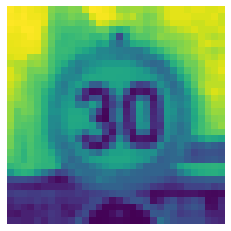

In [11]:
X_train = np.array(list(map(preprocessing.preprocess, X_train)))
X_val = np.array(list(map(preprocessing.preprocess, X_val)))
 
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)
print(X_val.shape)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)

X_val = X_val.reshape(4410, 32, 32, 1)

(15, 32, 32, 1)


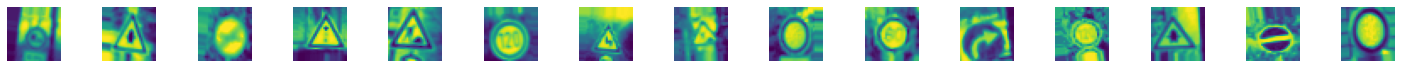

In [13]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)
# for X_batch, y_batch in
 
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [0]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
# create model
MyModel = model.modified_model()

In [15]:
print(MyModel.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

In [16]:
history = MyModel.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 61s 30ms/step - loss: 0.8707 - accuracy: 0.7464 - val_loss: 0.0789 - val_accuracy: 0.9766
Epoch 2/10
2000/2000 [==============================] - 55s 28ms/step - loss: 0.1945 - accuracy: 0.9397 - val_loss: 0.0693 - val_accuracy: 0.9807
Epoch 3/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.1258 - accuracy: 0.9604 - val_loss: 0.0285 - val_accuracy: 0.9905
Epoch 4/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.1011 - accuracy: 0.9686 - val_loss: 0.0384 - val_accuracy: 0.9882
Epoch 5/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.0866 - accuracy: 0.9734 - val_loss: 0.0268 - val_accuracy: 0.9909
Epoch 6/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.0768 - accuracy: 0.9762 - val_loss: 0.0504 - val_accuracy: 0.9853
Epoch 7/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.0695 - accuracy: 0.9792 - val_loss: 0.0991 -

Text(0.5, 0, 'epoch')

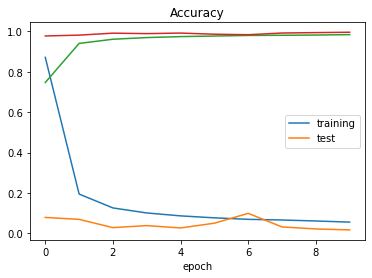

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')
 
